## Load the Libraries

In [1]:
# used for performing Numerical operations
import numpy as np 
# used for data manipulation and analysis 
import pandas as pd            
# used for statistical data visualization
import seaborn as  sns           
# used for plotting and visualization
import matplotlib.pyplot as plt   
# used for applying machine learning algorithm.
from sklearn.model_selection import train_test_split                      
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load the data set

In [2]:

# load the sample dataset into a dataframe
df=pd.read_csv('IRIS.csv')       
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Visualization

In [3]:
# Displaying the column names of the sample dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# Displaying the Brief summary of the sample dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# display descriptive statistics for the numerical values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Sepal_Length')

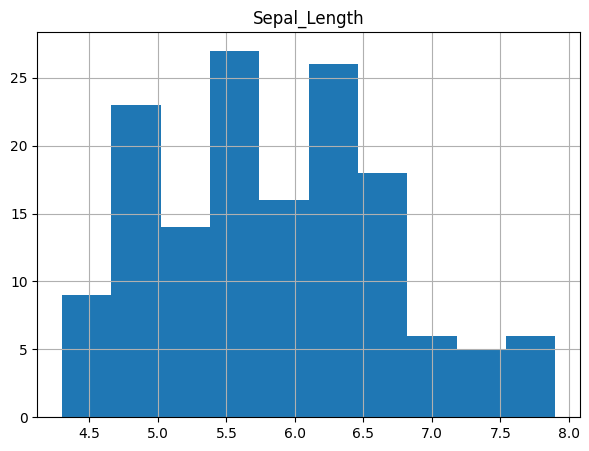

In [6]:
# Create the Histogram for "Sepal_length" column
df['sepal_length'].hist(figsize=(7,5))
plt.title("Sepal_Length")


Text(0.5, 1.0, 'Sepal_Width')

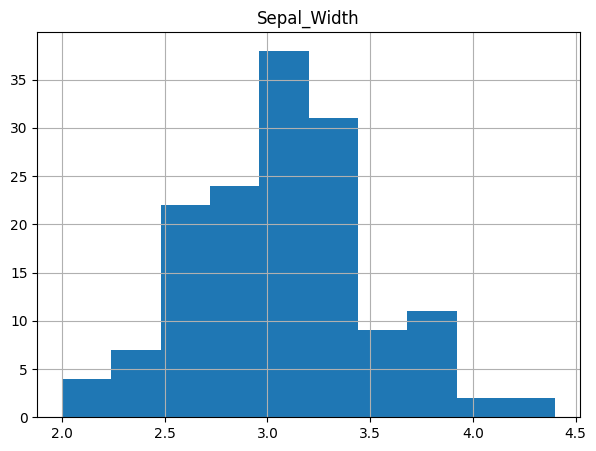

In [7]:
# Create the Histogram for "Sepal_width" column
df['sepal_width'].hist(figsize=(7,5))
plt.title('Sepal_Width')

Text(0.5, 1.0, 'petal_Width')

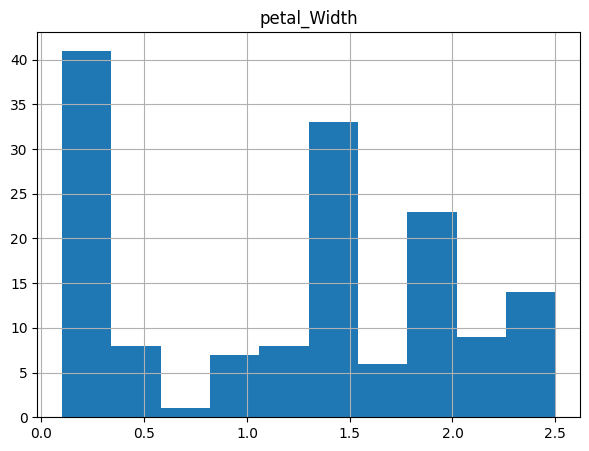

In [8]:
# Create the Histogram for "Petal_width" column
df['petal_width'].hist(figsize=(7,5))
plt.title('petal_Width')

Text(0.5, 1.0, 'Sepal_lenth')

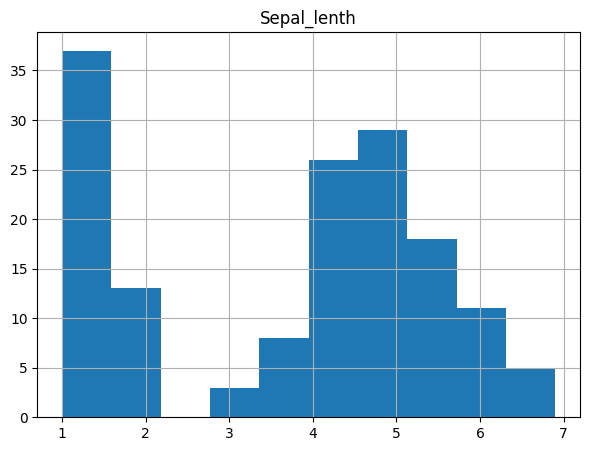

In [9]:
# Create the Histogram for "petal_length" column
df['petal_length'].hist(figsize=(7,5))
plt.title('Sepal_lenth')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


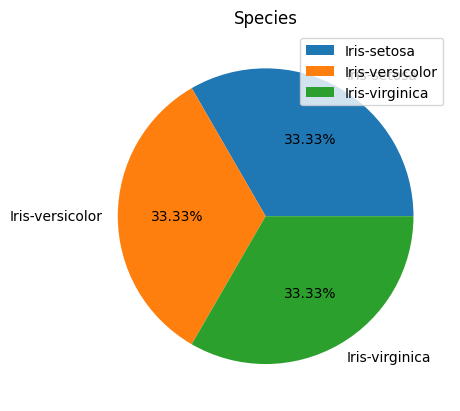

In [10]:
# count the unique values in 'species' column
print(df['species'].value_counts())
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',title='Species',ylabel='')
color=['red','orange','blue']
plt.legend()

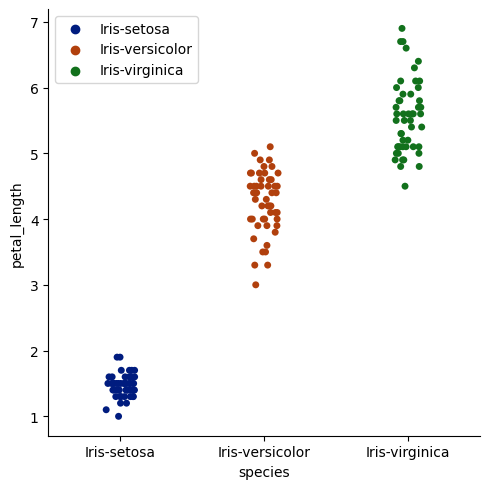

In [11]:
# Create the catplot between "species" and "petal_length" columns
sns.catplot(x=df['species'],y=df['petal_length'],palette='dark',hue=df['species'])
plt.legend()
plt.show()

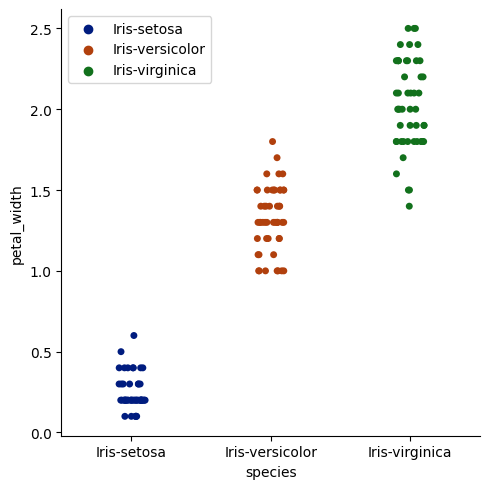

In [12]:
# Create the catplot between "species" and "petal_width" columns
sns.catplot(x=df['species'],y=df['petal_width'],palette='dark',hue=df['species'])
plt.legend()
plt.show()

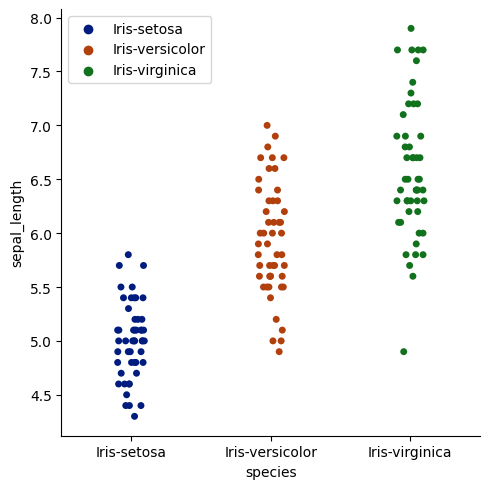

In [13]:
# Create the catplot between "species" and "sepal_length" columns
sns.catplot(x=df['species'],y=df['sepal_length'],palette='dark',hue=df['species'])
plt.legend()
plt.show()

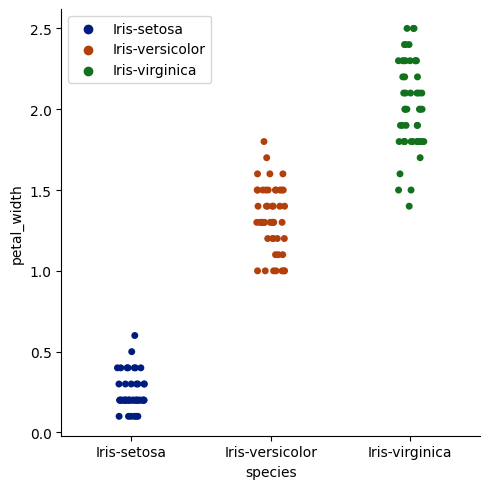

In [14]:
# Create the catplot between "species" and "petal_width" columns
sns.catplot(x=df['species'],y=df['petal_width'],palette='dark',hue=df['species'])
plt.legend()
plt.show()

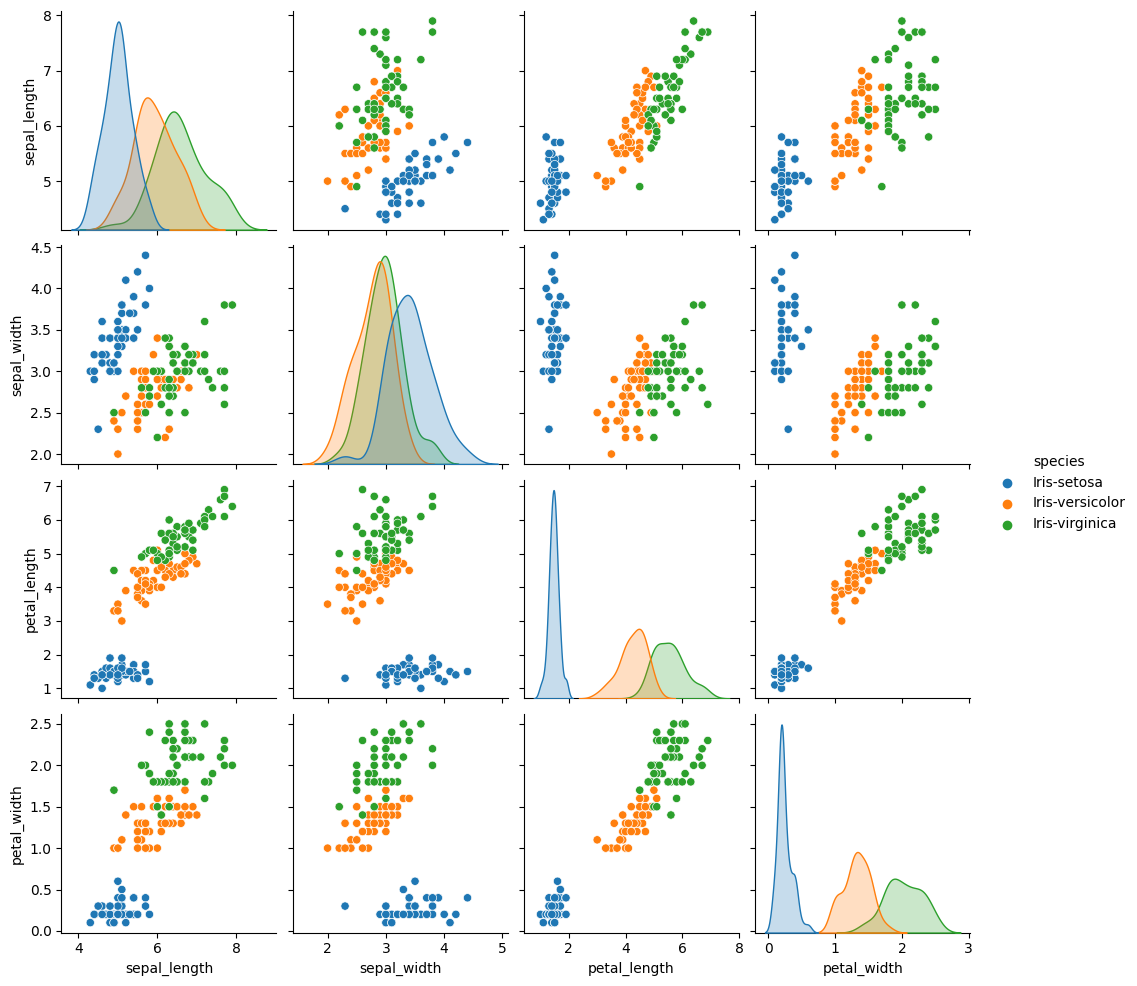

In [15]:
# Create the pairplot
sns.pairplot(df,hue='species')

## Data Preprocessing

#### Check the null values from the dataset

In [16]:
# find the Missing values from the dataset
Missing_vlaues=df.isnull().sum()
print(Missing_vlaues)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


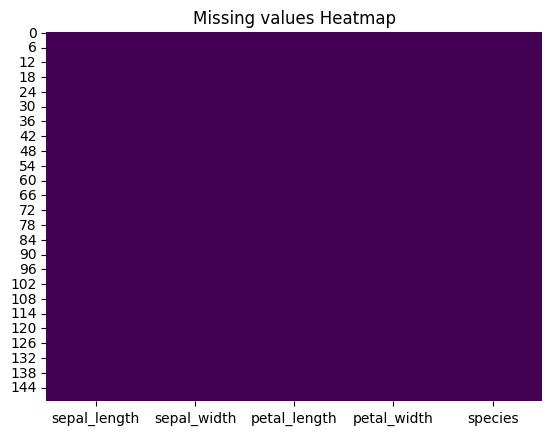

In [17]:
# Create the Heatmap
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title("Missing values Heatmap")
plt.show()

In [18]:
# Initialize the label encoder
label_encoder={}
# Apply label encoding to the "species"
for column in ['species']:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
# Calculate the correlation matrix
correlation_matrix=df.corr()

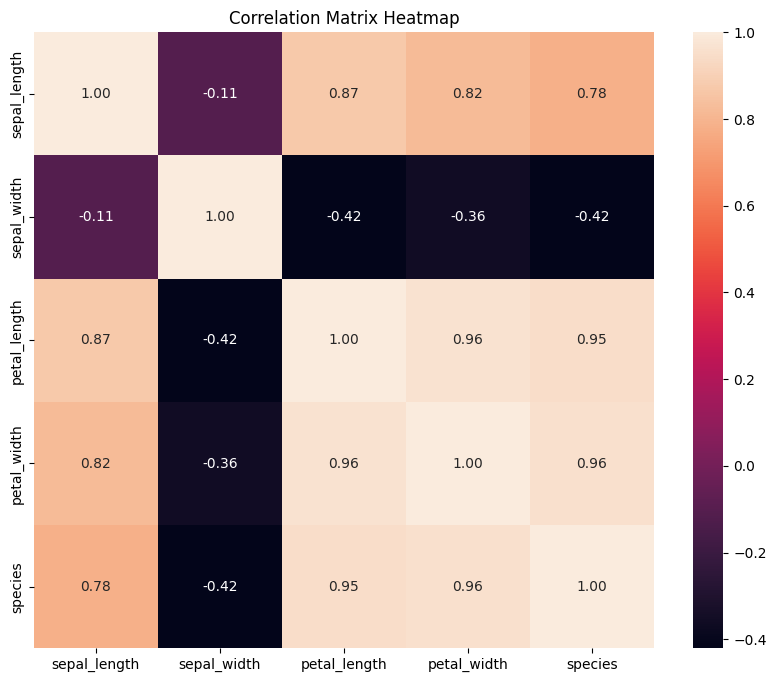

In [21]:
# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')              
plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the data into Training and Test set

In [23]:
# Define features (x) and target variable (y)
# y=target variable(output you want to predict)
# x=features used for training (input variables)
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']
x_train,x_test,y_train,y_test=(train_test_split(x,y,test_size=0.20))

## Model Evaluation

#### Random Forest classifier

Score of training_set: 1.0
Score of test_set: 0.9333333333333333
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      1.00      0.89         8
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Classification_Matrix:


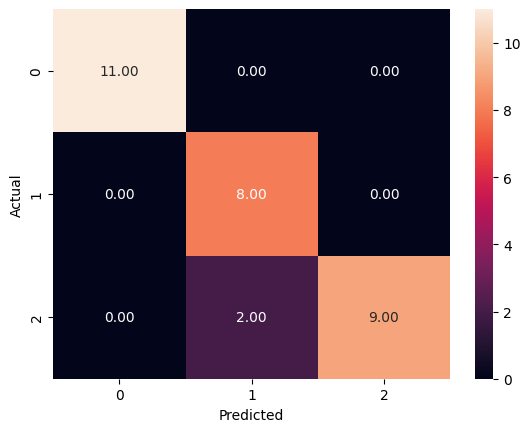

In [24]:
# Initialize the Random Forest Classifier model
R_f=RandomForestClassifier()
R_f.fit(x_train,y_train)

# Predict the target values for the test set
y_pred=R_f.predict(x_test)

print("Score of training_set:",R_f.score(x_train, y_train))
print("Score of test_set:",R_f.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True,fmt="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### Decision Tree Classifier

Score of training_set: 1.0
Score of test_set: 0.9333333333333333
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      1.00      0.89         8
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Classification_Matrix:


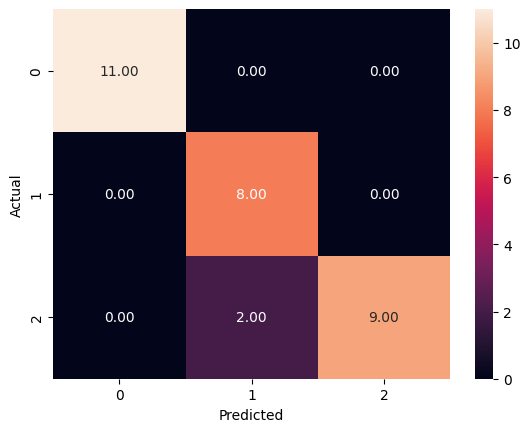

In [26]:
# Initialize the Decision Tree Classifier model
D_T_C=DecisionTreeClassifier()
D_T_C.fit(x_train,y_train)

# Predict the target values for the test set
y_pred=D_T_C.predict(x_test)

print("Score of training_set:",D_T_C.score(x_train, y_train))
print("Score of test_set:",D_T_C.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True,fmt="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Gaussin Naive Bayes

Score of training_set 0.9666666666666667
Score of testing_set 0.9333333333333333
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      1.00      0.89         8
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Classification_Matrix:


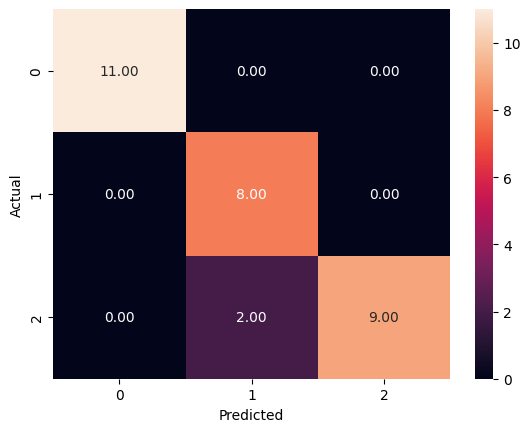

In [27]:
# Initialize the Gaussian naive bayes model
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train) 

# Predict the target values for the test set
Y_pred = gaussian.predict(x_test) 
print("Score of training_set",gaussian.score(x_train, y_train))
print("Score of testing_set", gaussian.score(x_test, y_test))


# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion report
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### K-Nearest Neighbor

Score of training_set 0.9666666666666667
Score of testing_set 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification_Matrix:


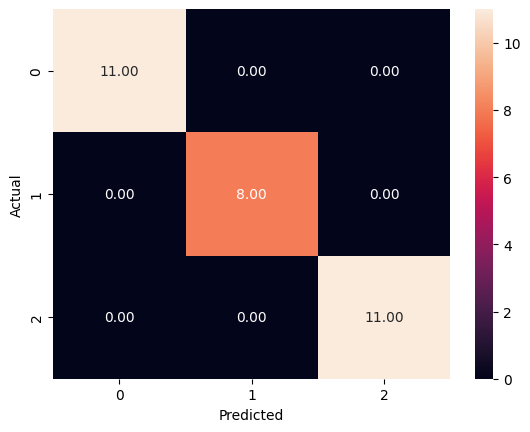

In [28]:
# Initialize the K-Nearest Neighbor model
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)

# Predict the target values for the test set
y_pred = kNN.predict(x_test)
print("Score of training_set",kNN.score(x_train, y_train))
print("Score of testing_set", kNN.score(x_test, y_test))

# Calculate the Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt ="0.2f")
# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)
print('Classification_Matrix:')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Comparing Machine Learning Models

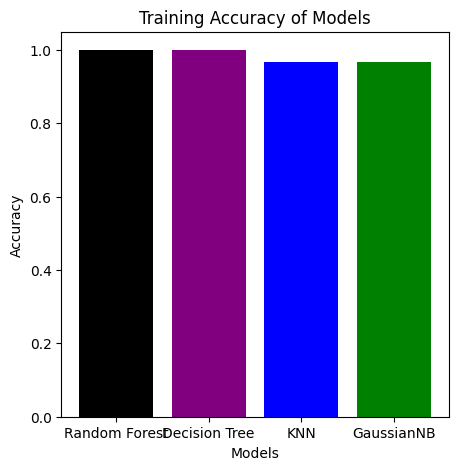

In [33]:
# Comparing all the Machine Learning Models and check the training accuracies of all the models
model_names = ["Random Forest","Decision Tree","KNN", "GaussianNB"]
train_accuracies = [R_f.score(x_train, y_train), D_T_C.score(x_train, y_train),
                     kNN.score(x_train, y_train),gaussian.score(x_train, y_train)]    
plt.figure(figsize=(5,5))
colors = ["black", "purple", "blue", "green"]
plt.bar(model_names, train_accuracies,color=colors)       
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.show()

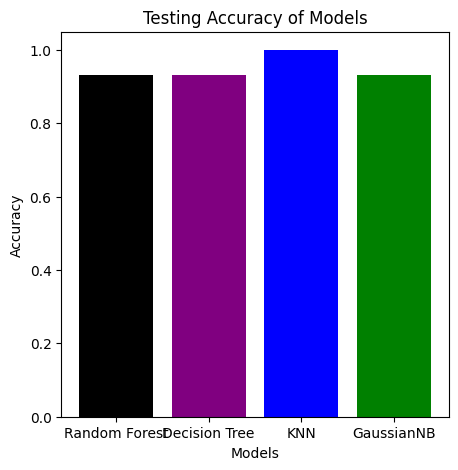

In [34]:
# Comparing all the Machine Learning Models and check the testing accuracies of all the models
model_names = ["Random Forest","Decision Tree","KNN", "GaussianNB"]
test_accuracies = [R_f.score(x_test, y_test), D_T_C.score(x_test, y_test),
                    kNN.score(x_test, y_test),gaussian.score(x_test, y_test)]    
plt.figure(figsize=(5,5))
colors = ["black", "purple", "blue", "green"]
plt.bar(model_names, test_accuracies,color=colors)       
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.show()

In [31]:
# Predict the Output
num_predictions=len(y_pred)
df = pd.DataFrame({'species': y_pred})

In [32]:
# Store output in .csv file
file_name = 'iris_classification.csv'
df.to_csv(file_name, index=False)